In [1]:
import emip_toolkit as emtk
import filter_fixation as ff
%load_ext autoreload
%autoreload 2

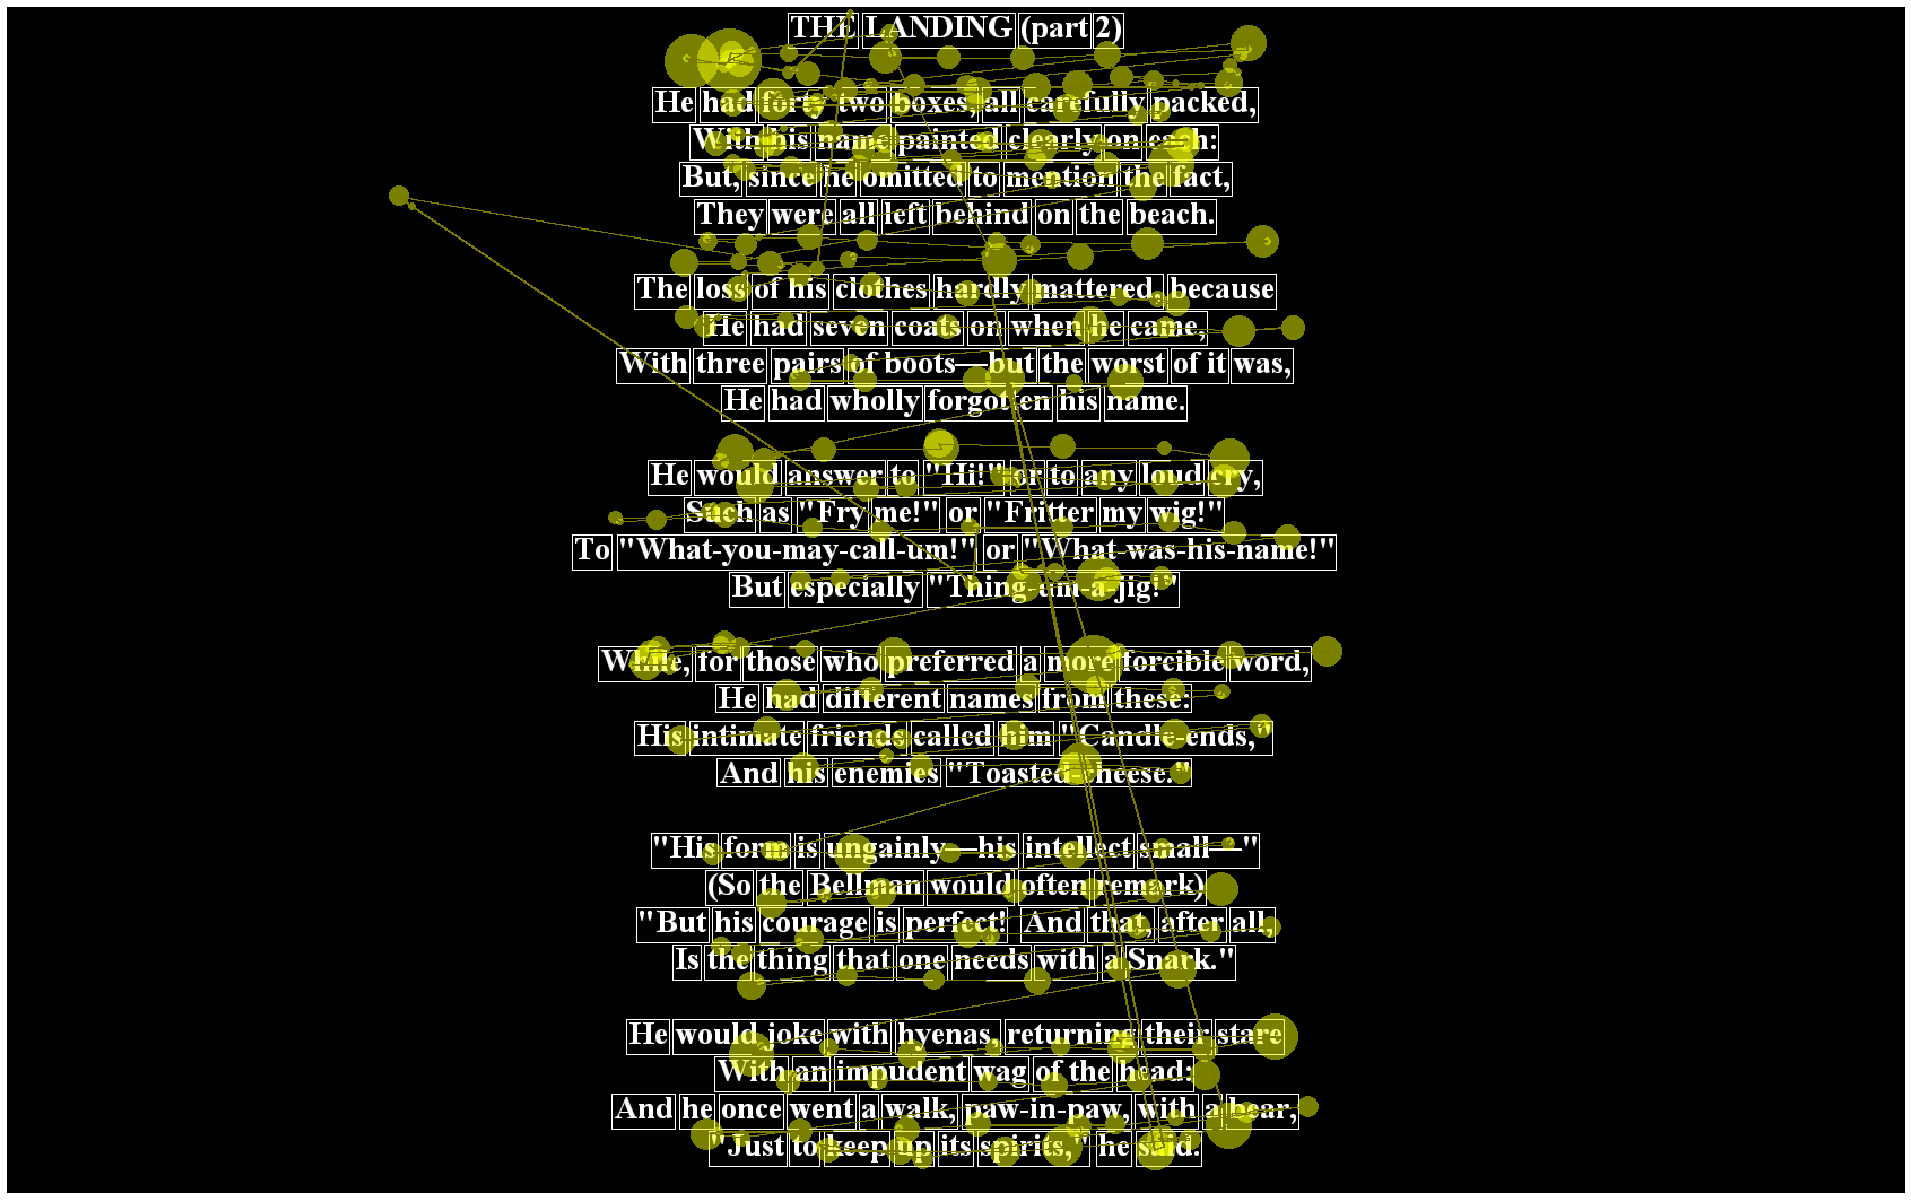

In [7]:
pixel_data = ff.process_GazeBase('datasets/GazeBase_TEX/Data/S_1314_S2_TEX.csv')
fixations, saccades = ff.filter_fixations(pixel_data)

test_trial = emtk.Trial(trial_id=2,
                       participant_id="314",
                       image="TEX_R1S2_bg.png",
                       fixations=fixations,
                       saccades=saccades,
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")

image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
test_trial.draw_trial(image_path=image_path, draw_saccade=True, draw_aoi=True, draw_number=False)

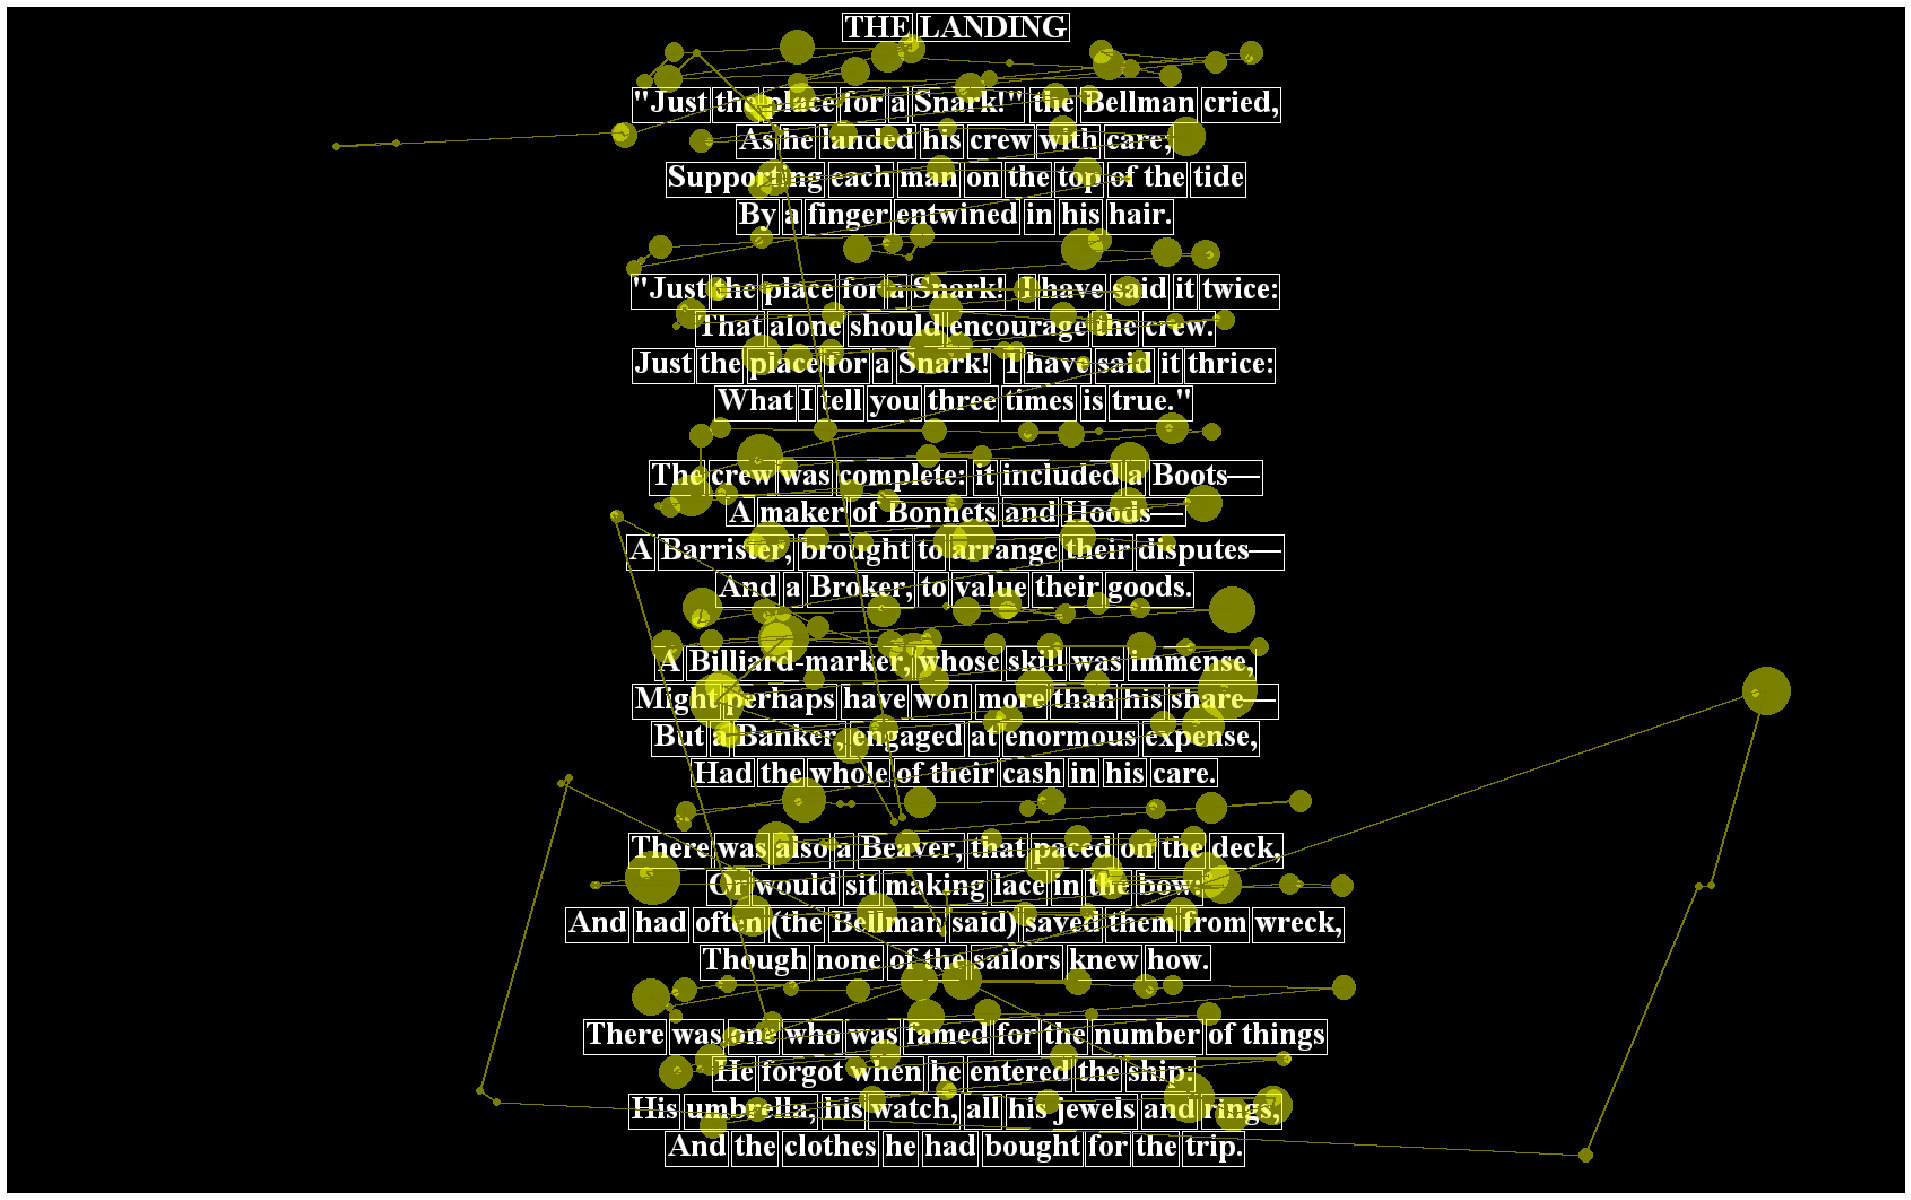

In [8]:
pixel_data = ff.process_GazeBase('datasets/GazeBase_TEX/Data/S_1002_S1_TEX.csv')
fixations, saccades = ff.filter_fixations(pixel_data)

test_trial = emtk.Trial(trial_id=2,
                       participant_id="002",
                       image="TEX_R1S1_bg.png",
                       fixations=fixations,
                       saccades=saccades,
                       blinks={},
                       samples={},
                       eye_tracker="EyeLink1000_")

image_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXScreenshots/'
test_trial.draw_trial(image_path=image_path, draw_saccade=True, draw_aoi=True, draw_number=False)

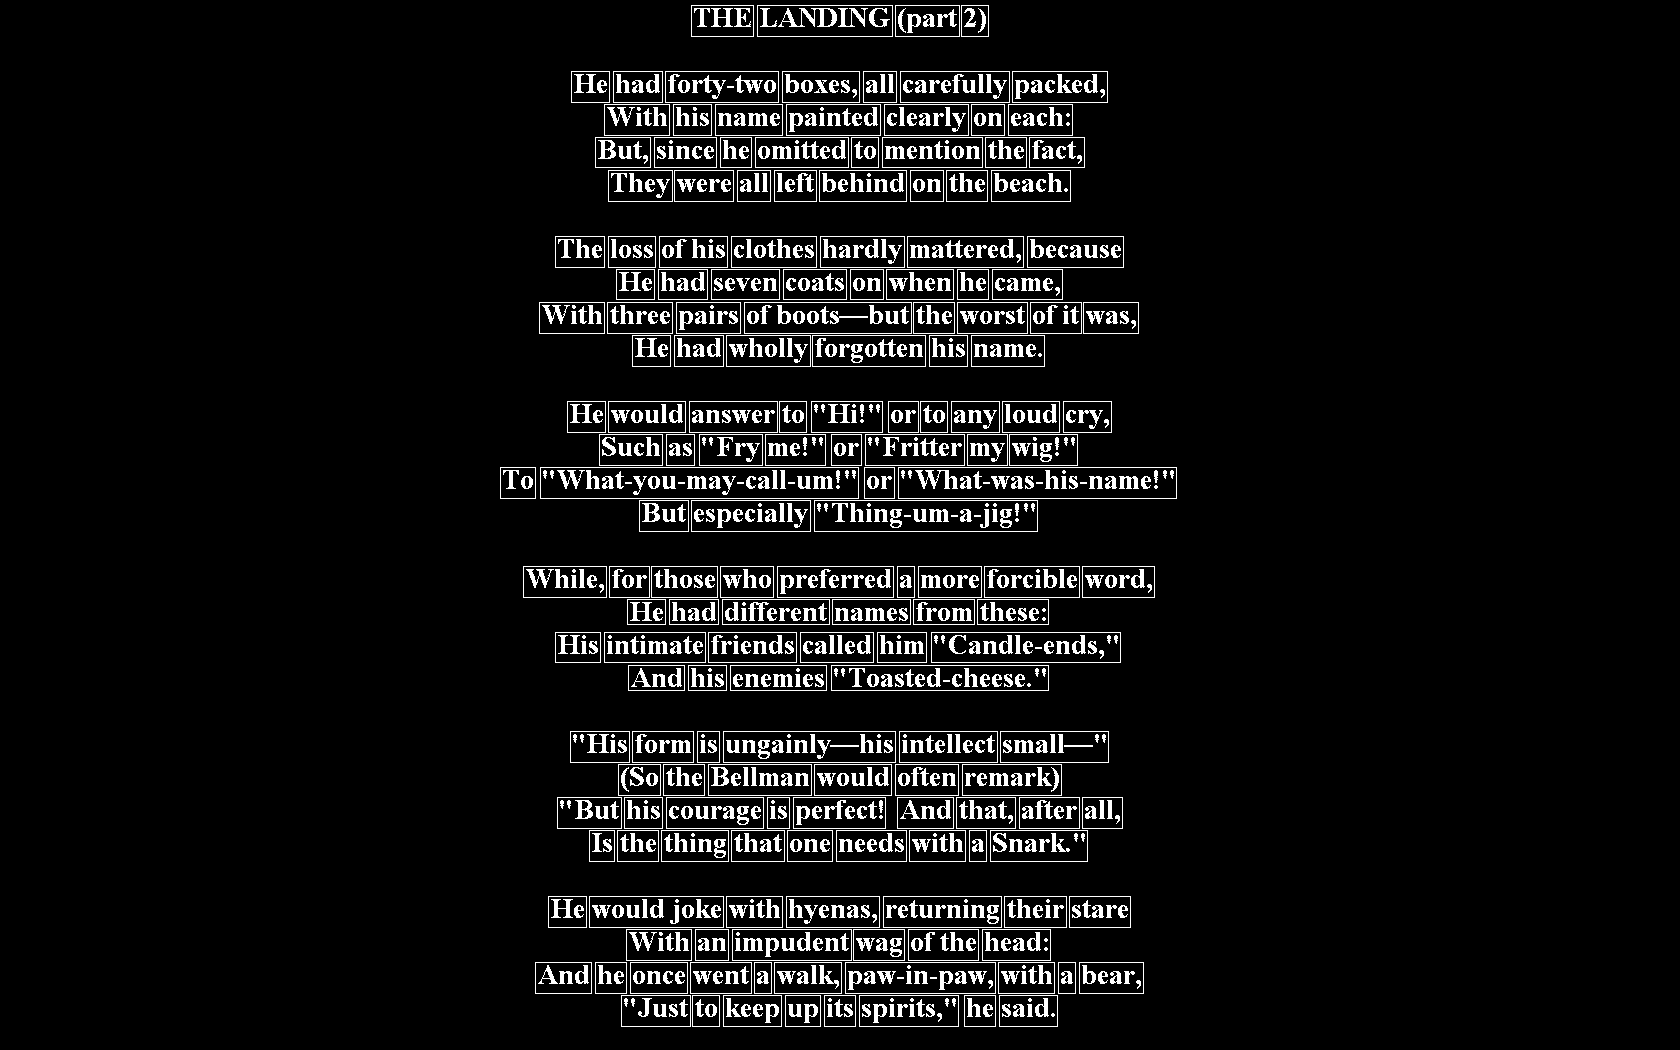

In [9]:
aoi = emtk.find_aoi(image='TEX_R1S2_bg.png', image_path=image_path)

emtk.draw_aoi(aoi, image='TEX_R1S2_bg.png', image_path=image_path)

In [10]:
aoi.head()

,kind,name,x,y,width,height,local_id,image
0,sub-line,line 1 part 1,691.5,5,63,32,NaN,TEX_R1S2_bg.png
1,sub-line,line 1 part 2,757.5,5,136,32,NaN,TEX_R1S2_bg.png
2,sub-line,line 1 part 3,895.5,5,65,32,NaN,TEX_R1S2_bg.png
3,sub-line,line 1 part 4,961.5,5,28,32,NaN,TEX_R1S2_bg.png
4,sub-line,line 2 part 1,571.5,71,39,32,NaN,TEX_R1S2_bg.png


In [11]:
file_path = 'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/'
aoi_token = emtk.add_tokens_to_AOIs(file_path=file_path, aois_raw=aoi)
aoi_token

,kind,name,x,y,width,height,local_id,image,token
0,sub-line,line 1 part 1,691.5,5,63,32,NaN,TEX_R1S2_bg.png,THE
1,sub-line,line 1 part 2,757.5,5,136,32,NaN,TEX_R1S2_bg.png,LANDING
2,sub-line,line 1 part 3,895.5,5,65,32,NaN,TEX_R1S2_bg.png,(part
3,sub-line,line 1 part 4,961.5,5,28,32,NaN,TEX_R1S2_bg.png,2)
4,sub-line,line 2 part 1,571.5,71,39,32,NaN,TEX_R1S2_bg.png,He
...,...,...,...,...,...,...,...,...,...
169,sub-line,line 25 part 4,785.5,995,36,32,NaN,TEX_R1S2_bg.png,up
170,sub-line,line 25 part 5,824.5,995,32,32,NaN,TEX_R1S2_bg.png,its
171,sub-line,line 25 part 6,859.5,995,100,32,NaN,TEX_R1S2_bg.png,"spirits,"""
172,sub-line,line 25 part 7,964.5,995,32,32,NaN,TEX_R1S2_bg.png,he


In [12]:
df = emtk.hit_test(test_trial, aoi_token)

all fixations: 307


In [26]:
df.to_csv('Hit Test Result.csv')